<a href="https://colab.research.google.com/github/namvux1404/Anomalies-detection---Vector-workshop/blob/Nam/testrun_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the GDN code from gitHub

In [1]:
!git clone https://github.com/d-ailin/GDN.git

Cloning into 'GDN'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 54 (delta 10), reused 6 (delta 6), pack-reused 27
Receiving objects: 100% (54/54), 473.31 KiB | 10.76 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Update python file due to Pytorch-geometric lib version issue from our folder

In [2]:
!git clone https://github.com/namvux1404/Anomalies-detection---Vector-workshop.git

Cloning into 'Anomalies-detection---Vector-workshop'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 111 (delta 24), reused 8 (delta 8), pack-reused 72
Receiving objects: 100% (111/111), 653.71 KiB | 13.34 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [3]:
#modify graph_layer.py
%cp /content/Anomalies-detection---Vector-workshop/modified_pyFile/graph_layer.py /content/GDN/models/graph_layer.py

#modify main.py
%cp /content/Anomalies-detection---Vector-workshop/modified_pyFile/main.py /content/GDN/main.py

#modify evaluate.py
%cp /content/Anomalies-detection---Vector-workshop/modified_pyFile/evaluate.py /content/GDN/evaluate.py

Install necessary libs for GDN

In [4]:
import os
os.chdir('./GDN/')

In [5]:
import torch
## check PyTorch version
print(torch.__version__)

2.0.1+cu118


In [6]:
!pip install torch_geometric
!pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.1+cu118.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=5777bc0d776197bd51fcf3c6f4a85d7622817716747260d224d2dfdf9dcf4b3d
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 28.6 MB/s eta 0:00:00


Install Kaleido lib for plotly fig saving

In [7]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00


# Explore the training and testing set

In [79]:
import pandas as pd
import plotly.express as px
import os

## define the folder to save figs
if not os.path.exists("/content/Anomalies-detection---Vector-workshop/images"):
  os.mkdir("/content/Anomalies-detection---Vector-workshop/images")

In [78]:
## read training set and plot the time-series data for four sensors
df_train = pd.read_csv('./data/msl/train.csv',sep=',')
fig_train = px.line(df_train, x=list(df_train.columns)[0], y= list(df_train.columns)[1:5])
fig_train.show()
fig_train.write_image("/content/Anomalies-detection---Vector-workshop/images/train_explore.png")

Load test set and labeled_anomalies data

In [24]:
df_test= pd.read_csv('./data/msl/test.csv',sep=',')
labeled_anomalies= pd.read_csv('/content/Anomalies-detection---Vector-workshop/data/labeled_anomalies.csv',sep=',')

In [54]:
labeled_anomalies = labeled_anomalies[labeled_anomalies['spacecraft'] == 'MSL']
labeled_anomalies

,chan_id,spacecraft,anomaly_sequences,class,num_values
55,M-6,MSL,"[[1850, 2030]]",[point],2049
56,M-1,MSL,"[[1110, 2250]]",[contextual],2277
57,M-2,MSL,"[[1110, 2250]]",[contextual],2277
58,S-2,MSL,"[[900, 910]]",[point],1827
59,P-10,MSL,"[[4590, 4720]]",[point],6100
60,T-4,MSL,"[[1172, 1240]]",[point],2217
61,T-5,MSL,"[[1200, 1225]]",[point],2218
62,F-7,MSL,"[[1250, 1450], [2670, 2790], [3325, 3425]]","[contextual, contextual, contextual]",5054
63,M-3,MSL,"[[1250, 1500]]",[contextual],2127
64,M-4,MSL,"[[1250, 1500]]",[contextual],2038


In [58]:
df_test

,timestamp,M-6,M-1,M-2,S-2,P-10,T-4,T-5,F-7,M-3,...,D-14,T-9,P-14,T-8,P-11,D-15,D-16,M-7,F-8,attack
0,0,-1.000000,0.999906,-0.748738,-1.0,0.992941,0.0,-1.0,-0.892857,1.000000,...,-1.0,0.639967,0.992941,-1.0,0.930975,-1.000000,-1.000000,-0.999133,-1.000000,0.0
1,1,-1.000000,0.999906,-0.748738,-1.0,0.993788,0.0,-1.0,-0.892857,1.000000,...,-1.0,0.639967,0.993788,-1.0,0.918009,0.832485,-1.000000,-0.999133,-0.565217,0.0
2,2,-1.000000,0.999906,-0.748738,-1.0,0.993788,0.0,-1.0,-0.428571,1.000000,...,-1.0,0.639967,0.993788,-1.0,0.927861,0.831559,-1.000000,-0.999133,-1.000000,0.0
3,3,-1.000000,0.999906,-0.748738,-1.0,0.994635,0.0,-1.0,-0.500000,1.000000,...,-1.0,0.639967,0.994635,-1.0,0.921442,0.831559,-1.000000,-0.999133,-1.000000,0.0
4,4,-1.000000,0.999906,-0.748738,-1.0,0.994635,0.0,-1.0,-0.892857,1.000000,...,-1.0,0.637897,0.994635,-1.0,0.916484,0.831559,-1.000000,-0.999133,-1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,2044,129.891892,0.525484,0.977248,0.0,0.994353,0.0,-1.0,1.000000,-0.364356,...,-1.0,0.000000,0.994353,0.0,0.761019,1.244331,0.079743,-0.999602,-1.000000,1.0
2045,2045,129.891892,0.999965,-0.748749,0.0,0.993788,0.0,-1.0,1.000000,-0.893946,...,-1.0,0.000000,0.993788,0.0,0.749642,-1.000000,0.092316,-0.999602,-1.000000,1.0
2046,2046,129.891892,0.999965,-0.748749,0.0,0.992941,0.0,-1.0,0.821429,-1.377165,...,-1.0,0.000000,0.992941,0.0,0.719134,-1.000000,0.092316,-0.999602,-1.000000,1.0
2047,2047,129.891892,0.999965,-0.748749,0.0,0.993223,0.0,-1.0,0.071429,-0.796085,...,-1.0,0.000000,0.993223,0.0,0.734452,1.242480,-1.000000,-0.999602,-1.000000,1.0


In [146]:
import ast
## attack labels for each sensor is obtained from here
## https://github.com/khundman/telemanom/blob/master/labeled_anomalies.csv


'''
Function to plot time series values of sensor
@agrs:
- sensor_name
- df : Pandas dataframe
- labeled_anomalies : dataframe with attack labels for each sensor
- filepath
- filename
'''
def plot_sensor_with_anomalies(sensor_name, df, labeled_anomalies,  save_as = False, filepath = "", filename = "") -> None:

    if 'timestamp' not in df.columns:
        df = df.reset_index('timestamp')

    anonymous_sequence_str = labeled_anomalies[labeled_anomalies['chan_id'] == sensor_name]['anomaly_sequences'].values[0]
    anonymous_sequence_list = ast.literal_eval(anonymous_sequence_str)[0] #convert array type string to list

    fig = px.line(df, x='timestamp', y= [sensor_name])
    num_row = df[sensor_name].count()
    fig.add_scatter(x=list(range(anonymous_sequence_list[0], min(anonymous_sequence_list[1], num_row)+1)),
                      y=df[(df['timestamp']>=anonymous_sequence_list[0])&(df['timestamp']<=anonymous_sequence_list[1])][sensor_name].tolist(),
                      mode='markers', marker=dict(size=10, color='Blue'), name='anonymous')

    fig.show()
    if save_as:
      if ((filepath == "") or (filename == "")):
        print("missing arguments")
      else:
        fullpath = filepath + filename #path to save image
        print(f"Save image to {fullpath}")
        fig.write_image(fullpath)      #save

M-6 point anonymous

In [147]:
## M-6 is point anonymous, anomalies are highlighted with blue circles
plot_sensor_with_anomalies('M-6', df_test, labeled_anomalies, save_as = True,
                           filepath = '/content/Anomalies-detection---Vector-workshop/images/',
                           filename = 'test_explore_M6.png')

Save image to /content/Anomalies-detection---Vector-workshop/images/test_explore_M6.png


M-2 contextual anonymous

In [148]:
## M-2 is contextual anonymous
plot_sensor_with_anomalies('M-2', df_test, labeled_anomalies, save_as = True,
                           filepath = '/content/Anomalies-detection---Vector-workshop/images/',
                           filename = 'test_explore_M2.png')

Save image to /content/Anomalies-detection---Vector-workshop/images/test_explore_M2.png


S-2 point anonymous

In [149]:
## S-2 is point anonymous
plot_sensor_with_anomalies('S-2', df_test, labeled_anomalies, save_as = True,
                           filepath = '/content/Anomalies-detection---Vector-workshop/images/',
                           filename = 'test_explore_S2.png')

Save image to /content/Anomalies-detection---Vector-workshop/images/test_explore_S2.png


# Run the training examples

##### args
- arg[0] : 0 GPU
- arg[1] : dataset msl
- arg[2] : slide_stride = 100

In [94]:
!bash run.sh 0 msl 100

/content/GDN/models/GDN.py:161: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  gated_i = torch.arange(0, node_num).T.unsqueeze(1).repeat(1, topk_num).flatten().to(device).unsqueeze(0)
epoch (0 / 30) (Loss:0.46357876, ACU_loss:18.07957160)
epoch (1 / 30) (Loss:0.27831617, ACU_loss:10.85433073)
epoch (2 / 30) (Loss:0.23245515, ACU_loss:9.06575081)
epoch (3 / 30) (Loss:0.21231870, ACU_loss:8.28042921)
epoch (4 / 30) (Loss:0.19132835, ACU_loss:7.46180572)
epoch (5 / 30) (Loss:0.17451125, ACU_loss:6.80593869)
epoch (6 / 30) (Loss:0.17282238, ACU_loss:6.74007297)
epoch (7 / 30) (Loss:0.16401211, ACU_loss:6.39647241)
epoch (8 / 30) (Loss:0.15154169, ACU_loss:5.91012604)
epoch (9 / 

# Show the saved embedding figure

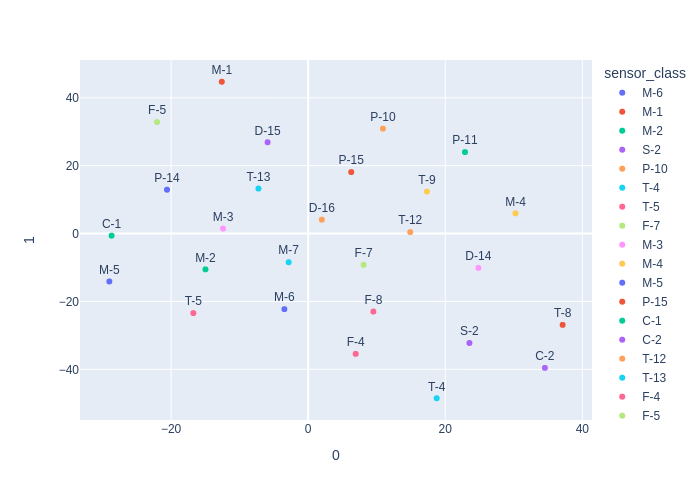

In [95]:
from PIL import Image
im = Image.open("/content/Anomalies-detection---Vector-workshop/images/test_embedding.png")
im

# Visualize the prediction results

In [96]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### load the predictions for each timestamp
path = '/content/Anomalies-detection---Vector-workshop/data/pred_labels.csv'
df = pd.read_csv(path)
df = df.rename(columns={"Unnamed: 0": "timestamp"})
df = df.set_index('timestamp')
df

,gt_label,pred_label
timestamp,,
0,0,0.0
1,0,0.0
2,0,0.0
3,0,1.0
4,0,1.0
...,...,...
2039,1,1.0
2040,1,1.0
2041,1,1.0


In [97]:
### compare the prediction and ground labels
cols = df.columns
ncols = len(cols)

# subplot setup
fig = make_subplots(rows=ncols, cols=1, shared_xaxes=True, vertical_spacing=0.03)

for i, col in enumerate(cols, start=1):
    fig.add_trace(go.Scatter(x=df[col].index, y=df[col].values, name=col), row=i, col=1)

fig.update_layout(title_text="Ground true label and predicted label")
fig.write_image('/content/Anomalies-detection---Vector-workshop/images/gt_pred_testLabel.png')
fig.show()

Compare the predictions for sensors

In [135]:
#get sensors name
df_test_1 = df_test.drop(columns=['timestamp','attack'])
sensors_name = df_test_1.columns.tolist()
sensors_name

['M-6',
 'M-1',
 'M-2',
 'S-2',
 'P-10',
 'T-4',
 'T-5',
 'F-7',
 'M-3',
 'M-4',
 'M-5',
 'P-15',
 'C-1',
 'C-2',
 'T-12',
 'T-13',
 'F-4',
 'F-5',
 'D-14',
 'T-9',
 'P-14',
 'T-8',
 'P-11',
 'D-15',
 'D-16',
 'M-7',
 'F-8']

In [161]:
path = '/content/Anomalies-detection---Vector-workshop/data/pred_sensor.csv'
df_pred = pd.read_csv(path)
df_pred = df_pred.rename(columns={"Unnamed: 0": "timestamp"})
df_pred = df_pred.set_index('timestamp')
df_pred.columns = sensors_name
df_pred

,M-6,M-1,M-2,S-2,P-10,T-4,T-5,F-7,M-3,M-4,...,F-5,D-14,T-9,P-14,T-8,P-11,D-15,D-16,M-7,F-8
timestamp,,,,,,,,,,,,,,,,,,,,,
0,-1.022653,0.729667,-0.976365,-0.979904,1.039862,-0.622378,-1.027939,-0.749938,1.010412,0.908588,...,-0.518138,-1.021854,0.312003,1.059893,-0.959330,0.871523,0.735942,-0.938324,-0.962435,-0.901656
1,-1.020160,0.086423,-0.976356,-0.979569,1.043187,-0.623733,-1.027339,-0.800802,1.020506,0.944131,...,-0.785140,-1.021740,0.315570,1.061473,-0.959649,0.874003,-0.201381,-0.937082,-0.984710,-0.924177
2,-1.024518,0.178596,-0.976347,-0.979503,1.044655,-0.623596,-1.026709,-0.788110,1.015370,0.992569,...,-0.776103,-1.021739,0.317697,1.065729,-0.959524,0.874278,0.541846,-0.931238,-0.980602,-0.907217
3,-1.023751,0.434971,-0.976338,-0.979387,1.026333,-0.623806,-1.026050,-0.774308,1.019958,0.973475,...,-0.770997,-1.021617,0.224806,1.018072,-0.959521,0.856954,0.998002,-0.959436,-0.987729,-0.907409
4,-1.020171,0.513594,-0.976329,-0.979320,1.007351,-0.623824,-1.025628,-0.775494,1.018021,0.954282,...,-0.602847,-1.021548,0.153363,0.976191,-0.959458,0.834744,0.662089,-0.941105,-0.982500,-0.898235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,-143.134506,0.944678,0.316691,-0.177386,0.984034,-0.364688,-0.831898,-0.070111,-0.233705,0.359375,...,-0.081334,-0.909670,0.033318,0.921747,-0.119212,0.773407,0.642636,0.021489,-0.702850,20.654528
2040,-143.134506,0.839922,0.309538,-0.175544,0.978604,-0.364301,-0.835367,-0.401246,0.024413,0.603543,...,-0.201291,-0.909624,0.043480,0.923002,-0.118148,0.777320,0.837329,0.050673,-0.734739,20.654528
2041,-143.134506,0.582120,-0.945399,-0.173575,0.980379,-0.362559,-0.952295,-0.459497,-0.649552,-1.548130,...,-0.577918,-0.900656,0.038018,0.918973,-0.116667,0.779219,-0.144779,0.085574,-0.888525,20.654528


In [162]:
path = '/content/Anomalies-detection---Vector-workshop/data/label_sensor.csv'
df_label = pd.read_csv(path)
df_label = df_label.rename(columns={"Unnamed: 0": "timestamp"})
df_label = df_label.set_index('timestamp')
df_label.columns = sensors_name
df_label

,M-6,M-1,M-2,S-2,P-10,T-4,T-5,F-7,M-3,M-4,...,F-5,D-14,T-9,P-14,T-8,P-11,D-15,D-16,M-7,F-8
timestamp,,,,,,,,,,,,,,,,,,,,,
0,-1.000000,0.999906,-0.748738,-1.0,0.993788,0.0,-1.0,-0.892857,1.000000,1.000005,...,-0.583649,-1.0,0.639967,0.993788,-1.0,0.916802,-1.000000,-1.000000,-0.999133,-1.000000
1,-1.000000,0.999906,-0.748738,-1.0,0.994070,0.0,-1.0,-0.785714,1.000000,1.000005,...,-0.582525,-1.0,0.639967,0.994070,-1.0,0.936441,-1.000000,-1.000000,-0.999133,-1.000000
2,-1.000000,0.999906,-0.748738,-1.0,0.993506,0.0,-1.0,-0.892857,1.000000,1.000005,...,-0.581326,-1.0,0.639967,0.993506,-1.0,0.781612,0.829708,-1.000000,-0.999133,-1.000000
3,-1.000000,0.999906,-0.748738,-1.0,0.994070,0.0,-1.0,-0.892857,1.000000,1.000005,...,-0.580876,-1.0,0.639967,0.994070,-1.0,0.677948,0.829708,-1.000000,-0.999133,-0.913043
4,-1.000000,0.999906,-0.748738,-1.0,0.994353,0.0,-1.0,-0.500000,1.000000,1.000005,...,-0.580276,-1.0,0.639967,0.994353,-1.0,0.676105,0.829708,-1.000000,-0.999133,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,129.891891,0.525484,0.977248,0.0,0.994353,0.0,-1.0,1.000000,-0.364356,0.000000,...,-0.701450,-1.0,0.000000,0.994353,0.0,0.761019,1.244331,0.079743,-0.999602,-1.000000
2040,129.891891,0.999965,-0.748749,0.0,0.993788,0.0,-1.0,1.000000,-0.893946,0.000000,...,-0.695830,-1.0,0.000000,0.993788,0.0,0.749642,-1.000000,0.092316,-0.999602,-1.000000
2041,129.891891,0.999965,-0.748749,0.0,0.992941,0.0,-1.0,0.821429,-1.377165,0.000000,...,-0.685039,-1.0,0.000000,0.992941,0.0,0.719134,-1.000000,0.092316,-0.999602,-1.000000


In [178]:
import ast
## attack labels for each sensor is obtained from here
## https://github.com/khundman/telemanom/blob/master/labeled_anomalies.csv


'''
Function to plot time series values of sensor
@agrs:
- sensor_name
- df_gt : ground true Pandas dataframe
- df_pred : predicted Pandas dataframe
- labeled_anomalies : dataframe with attack labels for each sensor
- filepath
- filename
'''
def plot_gtAndPred_sensor_with_anomalies(sensor_name, df_pred, df_gt, labeled_anomalies,  save_as = False, filepath = "", filename = "") -> None:

    df_merged = pd.merge(df_pred[sensor_name], df_gt[sensor_name], on='timestamp')
    df_merged = df_merged.rename(columns={sensor_name + "_x": sensor_name + "_pred", sensor_name + "_y": sensor_name + "_gt"})
    cols = df_merged.columns
    ncols = len(cols)
    num_row = df_gt[sensor_name].count()

    anonymous_sequence_str = labeled_anomalies[labeled_anomalies['chan_id'] == sensor_name]['anomaly_sequences'].values[0]
    anonymous_sequence_list = ast.literal_eval(anonymous_sequence_str)[0] #convert array type string to list


    # subplot setup
    fig = make_subplots(rows=ncols, cols=1, shared_xaxes=True, vertical_spacing=0.03)

    for i, col in enumerate(cols, start=1):
        fig.add_trace(go.Scatter(x=df_merged[col].index, y=df_merged[col].values, name=col), row=i, col=1)
        fig.add_scatter(x=list(range(anonymous_sequence_list[0], min(anonymous_sequence_list[1], num_row)+1)),
                      y=df_merged[(df_merged[col].index >= anonymous_sequence_list[0]) & (df_merged[col].index <= anonymous_sequence_list[1])][col].tolist(),
                      mode='markers', marker=dict(size=3, color='red'), name='anonymous', row=i, col=1)


    fig.update_layout(title_text="Ground true values and predicted value")

    fig.show()
    if save_as:
      if ((filepath == "") or (filename == "")):
        print("missing arguments")
      else:
        fullpath = filepath + filename #path to save image
        print(f"Save image to {fullpath}")
        fig.write_image(fullpath)      #save

In [181]:
plot_gtAndPred_sensor_with_anomalies('M-6', df_pred, df_label, labeled_anomalies, save_as = True,
                                     filepath = '/content/Anomalies-detection---Vector-workshop/images/',
                                     filename = 'pred_gt_M6.png')

Save image to /content/Anomalies-detection---Vector-workshop/images/pred_gt_M6.png


In [183]:
plot_gtAndPred_sensor_with_anomalies('M-2', df_pred, df_label, labeled_anomalies, save_as = True,
                                     filepath = '/content/Anomalies-detection---Vector-workshop/images/',
                                     filename = 'pred_gt_M2.png')

Save image to /content/Anomalies-detection---Vector-workshop/images/pred_gt_M2.png


In [184]:
plot_gtAndPred_sensor_with_anomalies('S-2', df_pred, df_label, labeled_anomalies, save_as = True,
                                     filepath = '/content/Anomalies-detection---Vector-workshop/images/',
                                     filename = 'pred_gt_S2.png')

Save image to /content/Anomalies-detection---Vector-workshop/images/pred_gt_S2.png
